In [1]:
import jax
import numpy as np
import jax.numpy as jnp
import pyccl as ccl
import matplotlib.pylab as plt

# jax cosmo
from jax_cosmo.core import Cosmology
import jax_cosmo.background as bkgrd

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 12

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


## Cosmological Parameters

In [2]:
cosmo_jax = Cosmology(Omega_c=0.25,
                      Omega_b=0.05,
                      h=0.7,
                      sigma8 = 0.8,
                      n_s=0.96,
                      Omega_k=0.,
                      w0=-1.,
                      wa=0.,
                     Neff = 3.044)

cosmo_ccl = ccl.Cosmology(Omega_c=0.25,
                          Omega_b=0.05,
                          h=0.7,
                          sigma8 = 0.8,
                          n_s=0.96,
                          Neff = 3.044,
                          w0=-1., 
                          wa=0.,
                          transfer_function='eisenstein_hu',
                          matter_power_spectrum='halofit')

## Comoving Radial Distance

In [3]:
z_source = np.linspace(1E-5, 1000.0, 1000)
a_source = 1. / (1. + z_source)

In [4]:
ccl_cmrd = ccl.background.comoving_radial_distance(cosmo_ccl, a = a_source)
jc_cmrd = bkgrd.radial_comoving_distance(cosmo_jax, a = a_source) / cosmo_jax.h

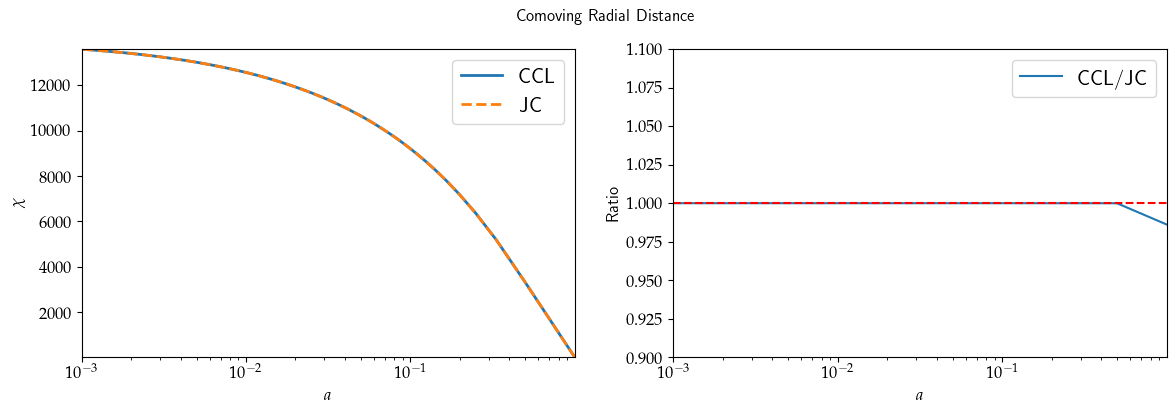

In [5]:
plt.figure(figsize = (14,4))
plt.suptitle('Comoving Radial Distance', fontsize = fontSize)
plt.subplot(121)
plt.plot(a_source, ccl_cmrd, lw=2, label = 'CCL')
plt.plot(a_source, jc_cmrd, lw=2, linestyle = '--', label = 'JC')
plt.xscale('log')
plt.xlim(min(a_source), max(a_source))
plt.ylim(min(ccl_cmrd), max(ccl_cmrd))
plt.ylabel(r'$\chi$', fontsize = fontSize)
plt.xlabel(r'$a$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.subplot(122)
plt.plot(a_source, ccl_cmrd/jc_cmrd, label = 'CCL/JC')
plt.xscale('log')
plt.axhline(1.0, linestyle = '--', c = 'r')
plt.ylim(0.9, 1.1)
plt.xlim(min(a_source), max(a_source))
plt.ylabel(r'Ratio', fontsize = fontSize)
plt.xlabel(r'$a$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()

## Luminosity Distance

In [6]:
ccl_ld = ccl.luminosity_distance(cosmo_ccl, a_source)
jc_ld = bkgrd.luminosity_distance(cosmo_jax, a_source)

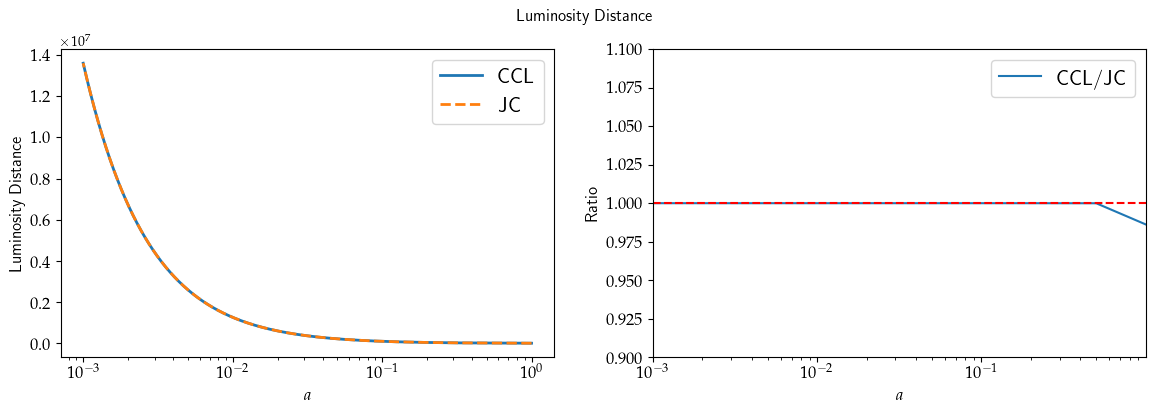

In [7]:
plt.figure(figsize = (14,4))
plt.suptitle('Luminosity Distance', fontsize = fontSize)
plt.subplot(121)
plt.plot(a_source, ccl_ld, lw=2, label = 'CCL')
plt.plot(a_source, jc_ld, lw=2, linestyle = '--', label = 'JC')
plt.xscale('log')
plt.ylabel('Luminosity Distance', fontsize = fontSize)
plt.xlabel(r'$a$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.subplot(122)
plt.plot(a_source, ccl_ld/jc_ld, label = 'CCL/JC')
plt.axhline(1.0, linestyle = '--', c = 'r')
plt.xscale('log')
plt.ylim(0.9, 1.1)
plt.xlim(min(a_source), max(a_source))
plt.ylabel(r'Ratio', fontsize = fontSize)
plt.xlabel(r'$a$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()

## Distance Modulus

In [8]:
ccl_dm = ccl.distance_modulus(cosmo_ccl,  a_source)
jc_dm = bkgrd.distance_modulus(cosmo_jax, a_source)

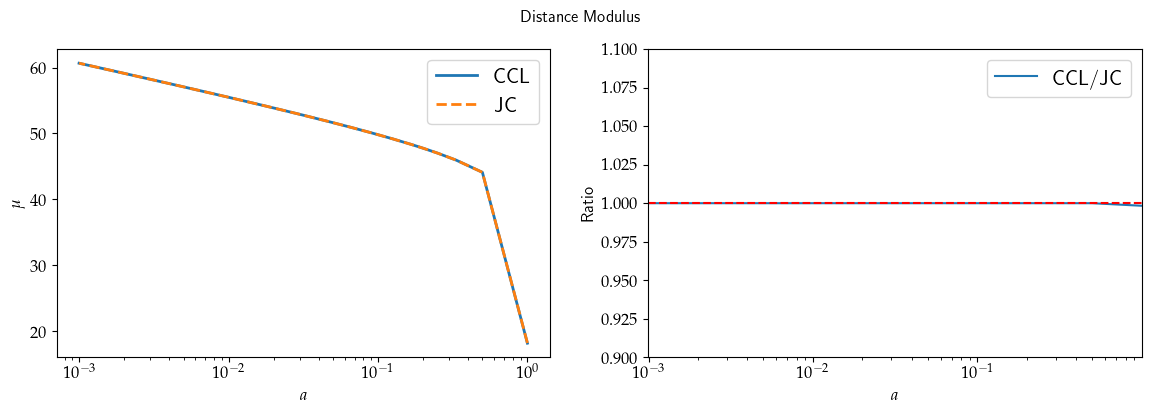

In [9]:
plt.figure(figsize = (14,4))
plt.suptitle('Distance Modulus', fontsize = fontSize)
plt.subplot(121)
plt.plot(a_source, ccl_dm, lw=2, label = 'CCL')
plt.plot(a_source, jc_dm, lw=2, linestyle = '--', label = 'JC')
plt.xscale('log')
plt.ylabel(r'$\mu$', fontsize = fontSize)
plt.xlabel(r'$a$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.subplot(122)
plt.plot(a_source, ccl_dm/jc_dm, label = 'CCL/JC')
plt.axhline(1.0, linestyle = '--', c = 'r')
plt.xscale('log')
plt.ylim(0.9, 1.1)
plt.xlim(min(a_source), max(a_source))
plt.ylabel(r'Ratio', fontsize = fontSize)
plt.xlabel(r'$a$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()